In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
data = pd.read_csv('/content/sales_data_sample (1).csv', encoding = 'unicode_escape')

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
data.shape

(2823, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
data.isnull().any()

ORDERNUMBER         False
QUANTITYORDERED     False
PRICEEACH           False
ORDERLINENUMBER     False
SALES               False
ORDERDATE           False
STATUS              False
QTR_ID              False
MONTH_ID            False
YEAR_ID             False
PRODUCTLINE         False
MSRP                False
PRODUCTCODE         False
CUSTOMERNAME        False
PHONE               False
ADDRESSLINE1        False
ADDRESSLINE2         True
CITY                False
STATE                True
POSTALCODE           True
COUNTRY             False
TERRITORY            True
CONTACTLASTNAME     False
CONTACTFIRSTNAME    False
DEALSIZE            False
dtype: bool

In [ ]:
data.isnull().mean()*100

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [ ]:
duplicate_rows = data[data.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE]
Index: []

[0 rows x 25 columns]


In [ ]:
def impute_most_frequent_labels(df):
    # List of columns to impute
    columns_to_impute = ["STATE", "POSTALCODE", "TERRITORY"]

    for column in columns_to_impute:
        most_occuring_label = data[column].mode()[0]
        data[column].fillna(most_occuring_label, inplace=True)

    return data

data = impute_most_frequent_labels(data)

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


In [ ]:
data.isnull().mean()*100

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE                0.000000
POSTALCODE           0.000000
COUNTRY              0.000000
TERRITORY            0.000000
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [ ]:
data.drop(['ADDRESSLINE2', 'ORDERDATE','PHONE'],axis=1, inplace=True)

In [ ]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'STATE',
       'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [ ]:
data.STATUS.value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [ ]:
data['STATUS'] = data['STATUS'].replace(['Shipped', 'Cancelled','Resolved','On Hold','In Process','Disputed'], ['1', '0','0','0','0','0'])

In [ ]:
data.STATUS.value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

In [ ]:
label = data['STATUS']

In [ ]:
data = data.drop(columns=['STATUS'])

In [ ]:
# Converting the original DataFrame to dummy coded data
data = pd.get_dummies(data)

In [ ]:
# Display the modified DataFrame
print(data)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

      QTR_ID  MONTH_ID  YEAR_ID  MSRP  PRODUCTLINE_Classic Cars  ...  \
0          1         2     

In [ ]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()

In [ ]:
# Fit and transform the data
scaled_data = object.fit_transform(data)

In [ ]:
# Create a new DataFrame with the scaled data
data_scaled = pd.DataFrame(scaled_data, columns = data.columns)

# Display the scaled DataFrame
print(data_scaled)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
0       -1.647947        -0.522891   0.596978        -1.057059 -0.370825   
1       -1.495888        -0.112201  -0.114450        -0.347015 -0.427897   
2       -1.354689         0.606505   0.549384        -1.057059  0.179443   
3       -1.235214         1.017195  -0.019759        -0.110334  0.104701   
4       -1.083154         1.427884   0.810158         1.783116  0.896740   
...           ...              ...        ...              ...       ...   
2818     0.991373        -1.549615   0.810158         2.019797 -0.711084   
2819     1.241185        -0.625563   0.810158        -1.293740  0.230579   
2820     1.382383         0.811850   0.810158        -0.583696  1.012024   
2821     1.501859        -0.112201  -1.061864        -1.293740 -0.780722   
2822     1.686503         1.222540  -0.899252         0.599710 -0.257637   

        QTR_ID  MONTH_ID   YEAR_ID      MSRP  PRODUCTLINE_Classic Cars  ...  \
0    -1.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
# Fit and transform the scaled data
pca_result = pca.fit_transform(data_scaled)

In [ ]:
# New DataFrame with the PCA result.
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [ ]:
# DataFrame with reduced dimensions
print(df_pca)

           PC1       PC2
0    -0.793029 -1.339552
1    -1.164008  0.066888
2    -1.027064  0.465041
3    -1.131864 -0.803151
4    -1.287053 -0.458592
...        ...       ...
2818 -1.818316  0.125761
2819 -1.960500  0.151290
2820 -1.881722  0.426572
2821 -1.861904  1.205952
2822 -1.141657 -0.929682

[2823 rows x 2 columns]


<ipython-input-34-0787ae6e07ab>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca['PC1'], df_pca['PC2'], c=label, cmap='magma', alpha=0.5)


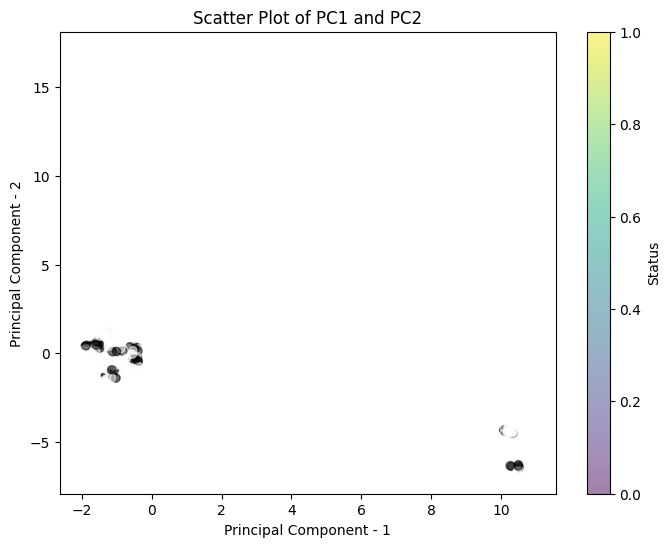

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=label, cmap='magma', alpha=0.5)
plt.colorbar(label='Status')
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.title('Scatter Plot of PC1 and PC2')
plt.show()

This scatter plot has two clusters and one outlier.

There are individual points that are far from the main cluster.These outliers may represent unusual or unique observations that deviate significantly from the general trend.

The closer the data points lie together to make a line, the higher the correlation. The data points are spread out even more in this graph.

There is still a trend in the data, so we would say that the data has a weak or lower correlation.As there is lower correlation in the data provided, this also means there is no trend to the data. Thus, there is no correlation.

In [ ]:
n_components_range = range(1, len(data_scaled.columns)+1)
explained_variance = []

In [ ]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(data_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

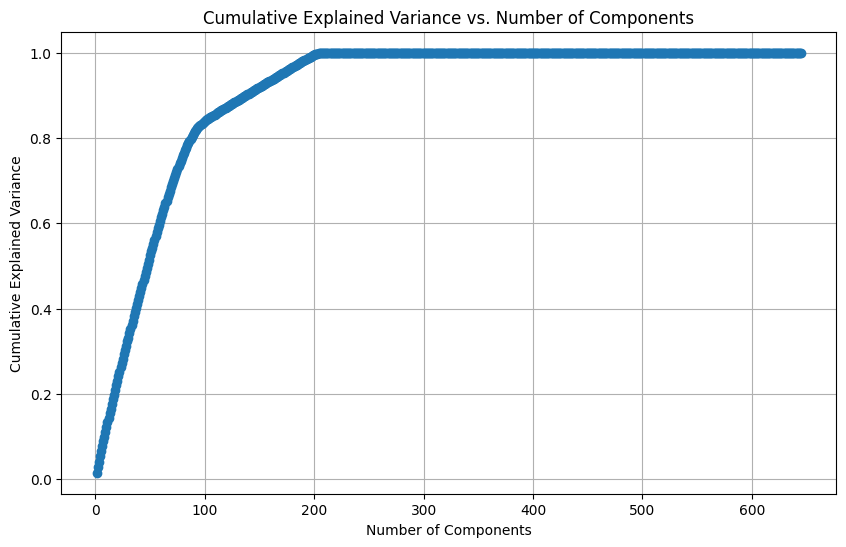

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# Assuming 'explained_variance' contains the cumulative explained variance values
desired_variance = 0.90

# Find the number of components that achieves 90% explained variance
for n, variance in enumerate(explained_variance):
    if variance >= desired_variance:
        components_needed = n + 1  # Add 1 because enumerate starts from 0
        break

print(f"Number of components for approximately 90% explained variance: {components_needed}")


Number of components for approximately 90% explained variance: 138


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a DataFrame called 'df_pca'
# Also assuming your labels are stored in a variable called 'label'
# You can replace these with the actual variable names if they're different

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(df_pca, label, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (2258, 2), y_train shape: (2258,)
X_test shape: (565, 2), y_test shape: (565,)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming you have your training data in 'X_train' and labels in 'y_train'
# You can replace these with the actual variable names if they're different

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components = 1)

# Fit the LDA model on the training data
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis(n_components=1)

In [ ]:
# Fit and transform the training data
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform the test data using parameters learned from the training data
X_test_lda = lda.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier()

classifier.fit(X_train_lda, y_train)

# Predict labels for the test data
y_pred = classifier.predict(X_test_lda)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.8743362831858407
